# Machine Learning Classification Comparing Five Linear Classification Algorithms

Algorithms compared:
1. Logistic Regression
2. Passive aggressive classifier
3. Perceptron classifier
4. Ridge classifier
5. SGD classifier

The dataset is a Bank Customer Churn Dataset available at https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 14
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\ML\classification\Bank_Customer_Churn_Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning

In [3]:
# Check for data information including missing data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Exploratory Data Analysis (EDA)

In [4]:
# Generate descriptive statistics
df.describe().round(1)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15690940.6,650.5,38.9,5.0,76485.9,1.5,0.7,0.5,100090.2,0.2
std,71936.2,96.7,10.5,2.9,62397.4,0.6,0.5,0.5,57510.5,0.4
min,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,11.6,0.0
25%,15628528.2,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.1,0.0
50%,15690738.0,652.0,37.0,5.0,97198.5,1.0,1.0,1.0,100193.9,0.0
75%,15753233.8,718.0,44.0,7.0,127644.2,2.0,1.0,1.0,149388.2,0.0
max,15815690.0,850.0,92.0,10.0,250898.1,4.0,1.0,1.0,199992.5,1.0


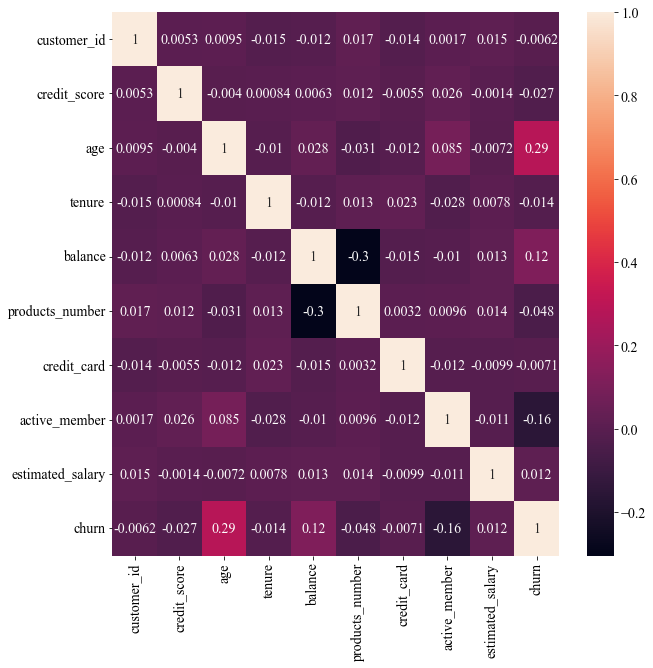

In [5]:
# Check correlations
correlation = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

### Data Preprocessing

In [6]:
# Change country and gender columns to numeric values
le = preprocessing.LabelEncoder()

col = ['country', 'gender']

for col in df.columns:
    df[col] = le.fit_transform(df[col])

df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,2736,228,0,0,24,2,0,0,1,1,5068,1
1,3258,217,2,0,23,1,743,0,0,1,5639,0
2,2104,111,0,0,24,8,5793,2,1,0,5707,1
3,5435,308,0,0,21,1,0,1,0,0,4704,0
4,6899,459,2,0,25,2,3696,0,1,1,3925,0
5,312,254,2,1,26,8,2674,1,1,0,7531,1
6,1058,431,0,1,32,7,0,1,1,1,513,0
7,3589,8,1,0,11,4,2781,3,1,0,5978,1
8,9066,110,0,1,26,4,4962,1,0,1,3718,0
9,1054,293,0,1,9,2,4450,0,1,1,3550,0


In [7]:
# The Country column is now coded in this way: France = 0, Germany = 1, Spain = 2
# Now the Gender column is coded in this way: Male =1 and Female = 0

In [8]:
# Select data

X = df.drop(['churn', 'customer_id'], axis=1) # Assuming the ID's were randomly given, they might not influence the result
y = df['churn']

### Feature Selection 

[6.48102017e-01 3.51164550e-01 7.24109398e-04 8.54069299e-06
 6.50379919e-07 5.30984770e-08 2.48029423e-08 1.97412282e-08
 1.87395146e-08 1.61286117e-08]
------------------------------------------------------------
Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')


Text(0, 0.5, 'Explained Variance Ratio')

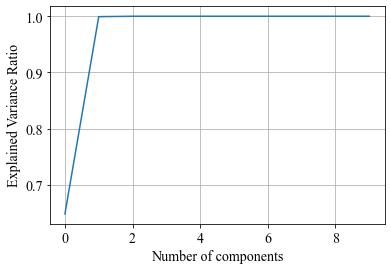

In [9]:
# Using Principal Component Analysis

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_) 
print('---'*20)
print(X.columns)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio')

In [10]:
# PCA shows that only the first 2 components explain the variance. 
# These are credit score and country

# So let us do feature selection with another method and see if they agree

In [11]:
# Using recursive feature elimination (RFE)

model_log_reg = linear_model.LogisticRegression(max_iter=100)

rfe = RFE(model_log_reg, n_features_to_select = 4)
rfe.fit_transform(X, y)
print(X.columns[rfe.support_])

Index(['country', 'gender', 'products_number', 'active_member'], dtype='object')


In [12]:
# I will opt to use the RFE method

selected_features = ['country', 'gender', 'products_number', 'active_member']

x_data = X[selected_features]

### More data preprocessing

In [13]:
# Scale the data
scaler = preprocessing.MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x_data), columns=x_data.columns)

In [14]:
x.head()

,country,gender,products_number,active_member
0,0.0,0.0,0.000000,1.0
1,1.0,0.0,0.000000,1.0
2,0.0,0.0,0.666667,0.0
3,0.0,0.0,0.333333,0.0
4,1.0,0.0,0.000000,1.0


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Do classification using different methods

In [16]:
# The classification methods are hereunder;

# Logistic Regression classifier
model_log_reg = linear_model.LogisticRegression() #This model was already highlighted up there
model_log_reg = model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)
y_pred_log_reg_prob = model_log_reg.predict_proba(X_test)


# Passive Aggressive classifier
model_pass_aggr = linear_model.PassiveAggressiveClassifier()
model_pass_aggr = model_pass_aggr.fit(X_train, y_train)
y_pred_pass_aggr = model_pass_aggr.predict(X_test)


# Perceptron classifier
model_percp = linear_model.Perceptron()
model_percp = model_percp.fit(X_train, y_train)
y_pred_percp = model_percp.predict(X_test)


# Ridge classifier
model_ridge = linear_model.RidgeClassifier()
model_ridge = model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)


# SGD classifier
model_sgd = linear_model.SGDClassifier()
model_sgd = model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)

### Evaluation

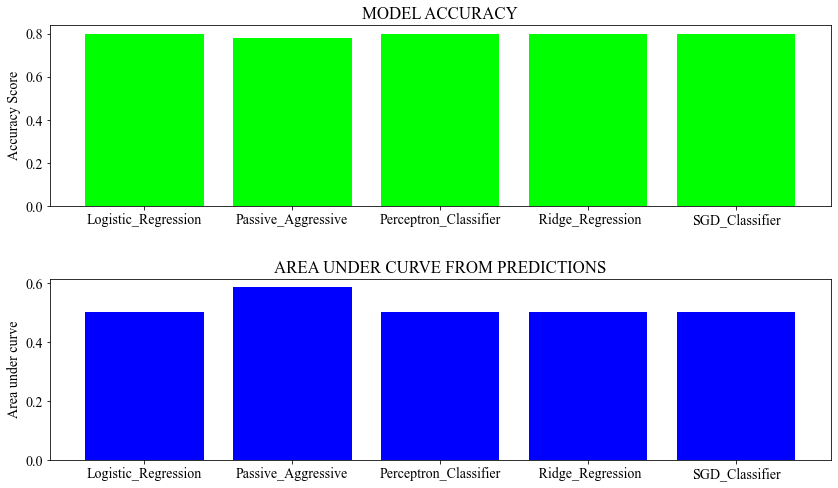

In [17]:
 # For Logistic Regression
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

# For Passive Aggressive classifier
acc_pass_aggr = accuracy_score(y_test, y_pred_pass_aggr)
auc_pass_aggr = roc_auc_score(y_test, y_pred_pass_aggr)

# For Perceptron classifier
acc_percp = accuracy_score(y_test, y_pred_percp)
auc_percp = roc_auc_score(y_test, y_pred_percp)

# For Ridge classifier
acc_ridge = accuracy_score(y_test, y_pred_ridge)
auc_ridge = roc_auc_score(y_test, y_pred_ridge)

# For SGD classifier
acc_sgd = accuracy_score(y_test, y_pred_sgd)
auc_sgd = roc_auc_score(y_test, y_pred_sgd)



# Put the calculated values in a DataFrame
df_acc_scores = pd.DataFrame({'Model':['Logistic_Regression', 'Passive_Aggressive', 'Perceptron_Classifier', ' Ridge_Regression', 'SGD_Classifier'],
                              'Accuracy_Score':[acc_log_reg, acc_pass_aggr, acc_percp, acc_ridge, acc_sgd],
                              'Area_under_curve':[auc_log_reg, auc_pass_aggr, auc_percp, auc_ridge, auc_sgd]})

df_acc_scores


# Make the plot
fig, ax = plt.subplots(figsize=(14,8))
plt.gcf().subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
plt.bar(x='Model', height='Accuracy_Score', data=df_acc_scores, color='lime')
plt.ylabel('Accuracy Score')
plt.title('MODEL ACCURACY')

plt.subplot(2,1,2)
plt.bar(x='Model', height='Area_under_curve', data=df_acc_scores, color='blue')
plt.ylabel('Area under curve')
plt.title('AREA UNDER CURVE FROM PREDICTIONS')
plt.show()

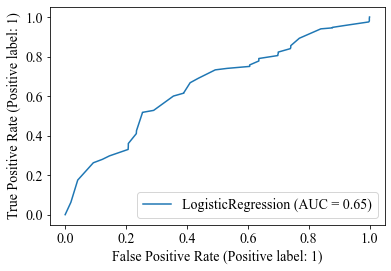

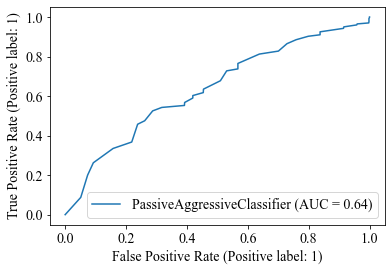

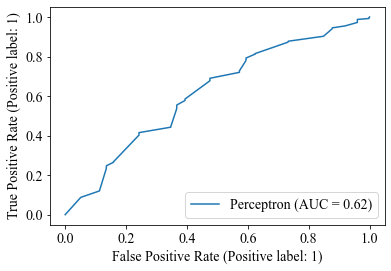

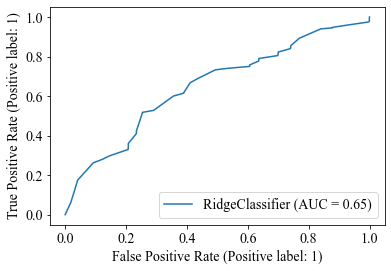

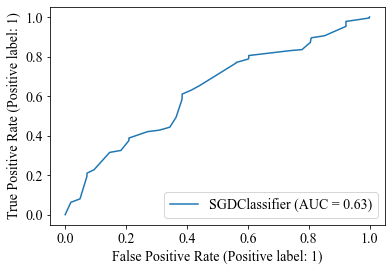

In [18]:
# From the above plot we an ides of ROC_AUC from the predictions, but how does it look like based on the estimators?
# Plot ROC curves from estimators
RocCurveDisplay.from_estimator(model_log_reg, X_test, y_test)
RocCurveDisplay.from_estimator(model_pass_aggr, X_test, y_test)
RocCurveDisplay.from_estimator(model_percp, X_test, y_test)
RocCurveDisplay.from_estimator(model_ridge, X_test, y_test)
RocCurveDisplay.from_estimator(model_sgd, X_test, y_test)
plt.show()

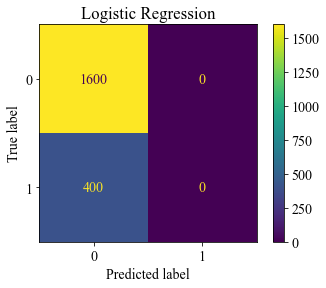

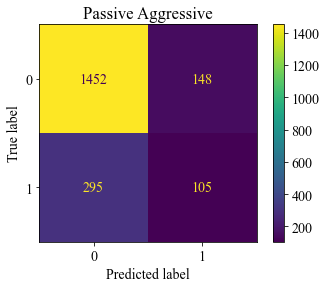

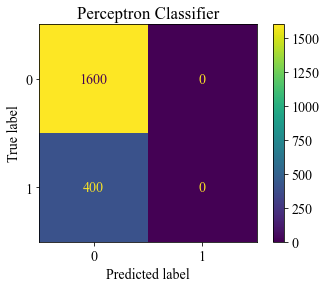

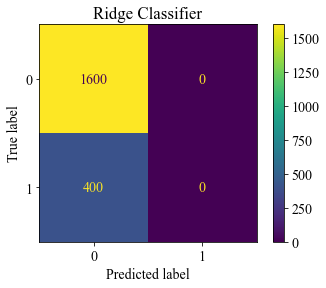

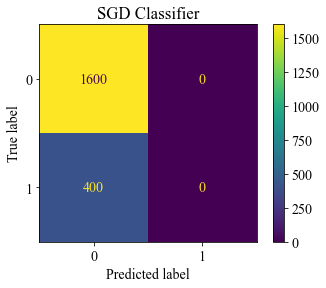

In [19]:
# Plotting the Confusion Matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(cm_log_reg)
disp_log_reg.plot()
plt.title('Logistic Regression')

cm_pass_agg = confusion_matrix(y_test, y_pred_pass_aggr)
displ_pass_agg =  ConfusionMatrixDisplay(cm_pass_agg)
displ_pass_agg.plot()
plt.title('Passive Aggressive')

cm_percp = confusion_matrix(y_test, y_pred_percp)
displ_percp =  ConfusionMatrixDisplay(cm_percp)
displ_percp.plot()
plt.title('Perceptron Classifier')

cm_ridge = confusion_matrix(y_test, y_pred_ridge)
displ_ridge =  ConfusionMatrixDisplay(cm_ridge)
displ_ridge.plot()
plt.title('Ridge Classifier')

cm_sgd = confusion_matrix(y_test, y_pred_sgd)
displ_sgd =  ConfusionMatrixDisplay(cm_sgd)
displ_sgd.plot()
plt.title('SGD Classifier')

plt.show()

In [20]:
# Get stats from confusion matrices

print('==='*7)
print('Logistic Regression')
print('==='*7)
print('Sensitivity or True Positive Rate = TP/(TP+FN) =', (0/(0+426)))
print('Specificity or True Negative Rate = TN/(TN+FP) =', (1574/(1574+0)))
print('***'*20)
print('Passive Aggressive')
print('==='*7)
print('Sensitivity or True Positive Rate = TP/(TP+FN) =', (32/(32+394)))
print('Specificity or True Negative Rate = TN/(TN+FP) =', (1322/(1322+252)))
print('***'*20)
print('Perceptron')
print('==='*7)
print('Sensitivity or True Positive Rate = TP/(TP+FN) =', (70/(70+356)))
print('Specificity or True Negative Rate = TN/(TN+FP) =', (1453/(1453+121)))
print('***'*20)
print('Ridge Regression')
print('==='*7)
print('Sensitivity or True Positive Rate = TP/(TP+FN) =', (0/(0+426)))
print('Specificity or True Negative Rate = TN/(TN+FP) =', (1574/(1574+0)))
print('***'*20)
print('SGD Regression')
print('==='*7)
print('Sensitivity or True Positive Rate = TP/(TP+FN) =', (0/(0+426)))
print('Specificity or True Negative Rate = TN/(TN+FP) =', (1574/(1574+0)))

Logistic Regression
Sensitivity or True Positive Rate = TP/(TP+FN) = 0.0
Specificity or True Negative Rate = TN/(TN+FP) = 1.0
************************************************************
Passive Aggressive
Sensitivity or True Positive Rate = TP/(TP+FN) = 0.07511737089201878
Specificity or True Negative Rate = TN/(TN+FP) = 0.8398983481575604
************************************************************
Perceptron
Sensitivity or True Positive Rate = TP/(TP+FN) = 0.1643192488262911
Specificity or True Negative Rate = TN/(TN+FP) = 0.923125794155019
************************************************************
Ridge Regression
Sensitivity or True Positive Rate = TP/(TP+FN) = 0.0
Specificity or True Negative Rate = TN/(TN+FP) = 1.0
************************************************************
SGD Regression
Sensitivity or True Positive Rate = TP/(TP+FN) = 0.0
Specificity or True Negative Rate = TN/(TN+FP) = 1.0


### FINDINGS

### 1. All models had an accuracy of just under 80% except for the passive aggressive classifier whose accuracy was much lower.
### 2. All models had an area under the curve (auc) of about 0.5 from the predictions. This suggests that none of them performed well enough to give results that would differ from a random classification.
### 3. Based on the estimator values, logistic regression and ridge classification had the highest auc of 0.64.
### 4. All models had a high true negative rate. They are likely to correctly predict the customers who stayed at the bank.